In [1]:
from fastai.vision.all import *
import csv
import glob
from collections import namedtuple
from pathlib import Path

/home/josalhor/Desktop/eurecat-2022/venv/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
a1_attr = 'path description'
A1Row = namedtuple('A1Row', a1_attr)
csv_path = 'a1.csv'


In [3]:
rows = []
description_map = {}
A1_input = []

with open(csv_path, newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',', quotechar='"')
    for i, (partial_path, description) in enumerate(spamreader):
        if i == 0: continue
        path = Path('A/A/A1') / partial_path
        row = A1Row(path, description)
        rows.append(row)
        description_map[row.path.name] = row
        A1_input.append(row.path)


In [4]:
def plot_metrics(name, self: Recorder, nrows=None, ncols=None, figsize=None, **kwargs):
    metrics = np.stack(self.values)
    names = self.metric_names[1:-1]
    n = len(names) - 1
    if nrows is None and ncols is None:
        nrows = int(math.sqrt(n))
        ncols = int(np.ceil(n / nrows))
    elif nrows is None: nrows = int(np.ceil(n / ncols))
    elif ncols is None: ncols = int(np.ceil(n / nrows))
    figsize = figsize or (ncols * 6, nrows * 4)
    fig, axs = subplots(nrows, ncols, figsize=figsize, **kwargs)
    axs = [ax if i < n else ax.set_axis_off() for i, ax in enumerate(axs.flatten())][:n]
    for i, (name, ax) in enumerate(zip(names, [axs[0]] + axs)):
        ax.plot(metrics[:, i], color='#1f77b4' if i == 0 else '#ff7f0e', label='valid' if i > 0 else 'train')
        ax.set_title(name if i > 1 else 'losses')
        ax.legend(loc='best')
    plt.savefig(f'{name}.png')

In [18]:
def description_label(f):
    return description_map[f].description
path = Path('A/A/A1')

In [19]:
def train(name, label_fn):
    print('Training', name)
    dls = ImageDataLoaders.from_name_func(path, A1_input, label_fn, item_tfms=Resize(224))
    learn = vision_learner(dls, resnet18, metrics=[error_rate, accuracy, F1Score(average='micro'), Recall(average='micro'), Precision(average='micro')])
    learn.fine_tune(2)
    plot_metrics(name, learn.recorder)
    learn.show_results()
    return learn
    
    

Training Purple


/home/josalhor/Desktop/eurecat-2022/venv/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/josalhor/Desktop/eurecat-2022/venv/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,accuracy,f1_score,recall_score,precision_score,time
0,0.719497,0.251611,0.092044,0.907956,0.907956,0.907956,0.907956,30:43


epoch,train_loss,valid_loss,error_rate,accuracy,f1_score,recall_score,precision_score,time
0,0.042956,0.020218,0.009360,0.990640,0.990640,0.990640,0.990640,02:42
1,0.027747,0.007560,0.003120,0.996880,0.996880,0.996880,0.996880,02:48


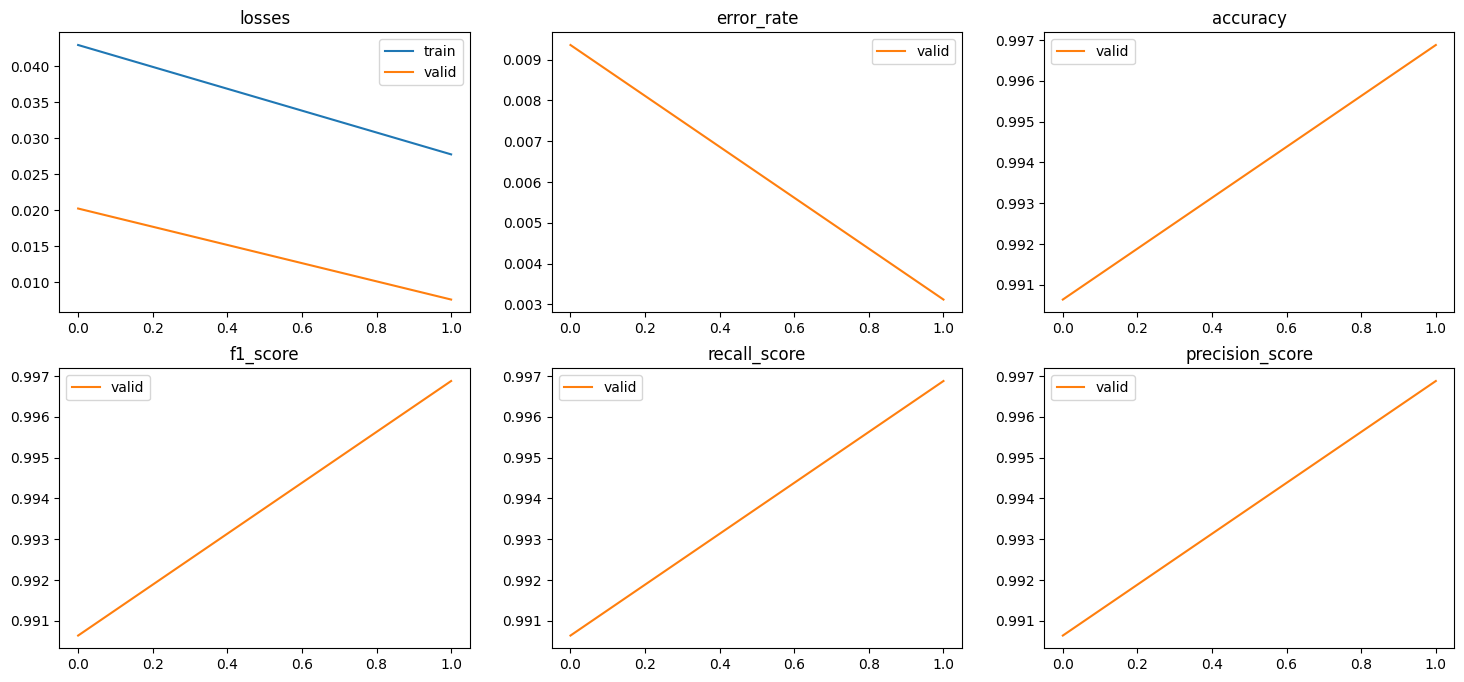

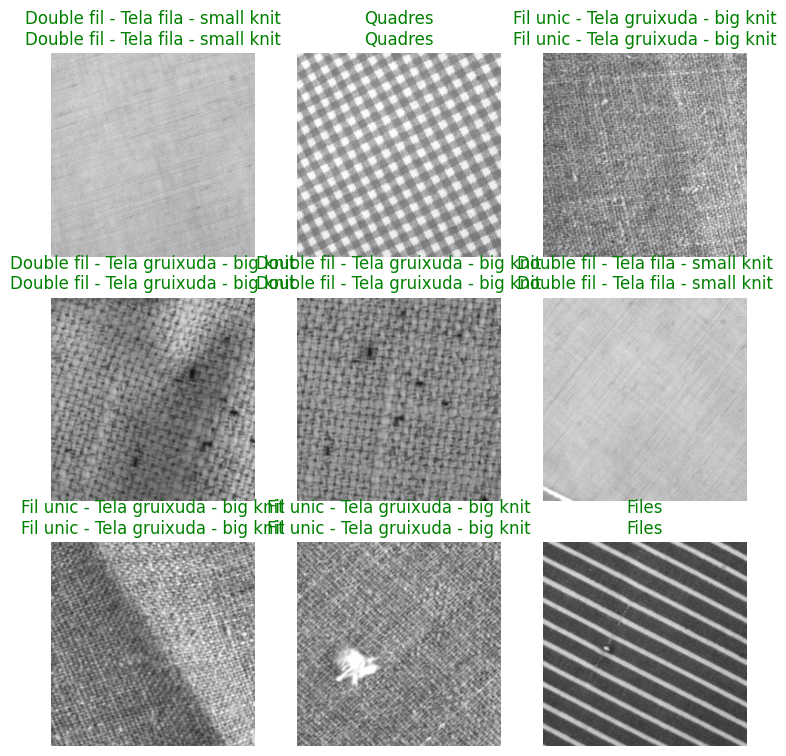

In [20]:
learn = train('Purple', description_label)

In [23]:
learn.export('purple')